In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./mnist_train.csv')

In [3]:
print(df.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
l=df['label']
d=df.drop("label",axis=1)

100


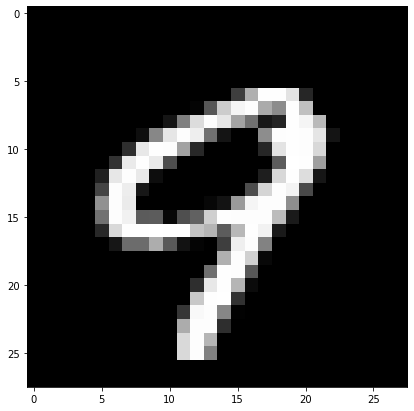

9


In [5]:
plt.figure(figsize=(7,7))
idx=int(input())

grid_data=d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation="none",cmap="gray")
plt.show()

print(l[idx])

In [6]:
labels = l.head(15000)
data = d.head(15000)

print("shape of sample data: ",data.shape)

shape of sample data:  (15000, 784)


In [7]:
#data preprocessing

from sklearn.preprocessing import StandardScaler
stand_data = StandardScaler().fit_transform(data)
print(stand_data.shape)

(15000, 784)


In [8]:
sample_data=stand_data
cov_matrix=np.matmul(sample_data.T,sample_data)
print("covar_martix shape: ",cov_matrix.shape)

covar_martix shape:  (784, 784)


In [9]:
from scipy.linalg import eigh

values,vectors=eigh(cov_matrix, eigvals=(782,783))

print("The shape of eigen vectors = ",vectors.shape)
vectors=vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

The shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [10]:
import matplotlib.pyplot as plt
new_coor=np.matmul(vectors,sample_data.T)
print("resultant new data point's shape: ",vectors.shape,"X", sample_data.shape," = ",new_coor.shape)

resultant new data point's shape:  (2, 784) X (15000, 784)  =  (2, 15000)


In [11]:
new_coor=np.vstack((new_coor,labels)).T
df=pd.DataFrame(data=new_coor, columns=("1st_principal","2nd_principal","label"))
print(df.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


c:\users\milin\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


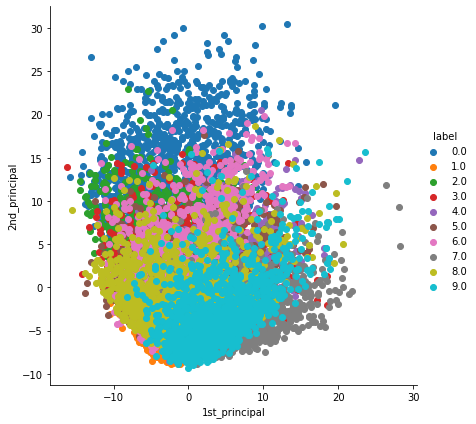

In [12]:
import seaborn as sn
sn.FacetGrid(df, hue="label",size=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()
plt.show()

In [18]:
from sklearn import decomposition
pca=decomposition.PCA()

In [19]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print("shape of PCA reduced = ",pca_data.shape)

shape of PCA reduced =  (15000, 2)


In [20]:
pca_data=np.vstack((pca_data.T,labels)).T

pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))

c:\users\milin\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


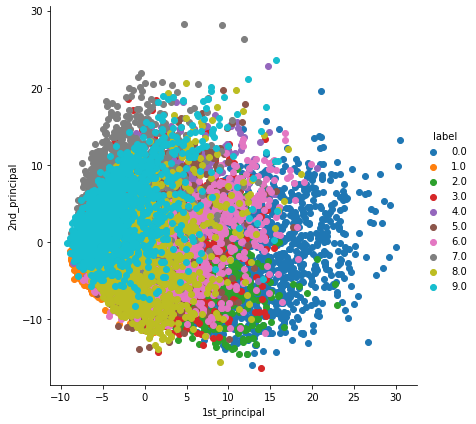

In [21]:
sn.FacetGrid(pca_df, hue="label",size=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()